In [22]:
 from __future__ import print_function
import torch as t
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
show = ToPILImage() # 可以把Tensor转成Image，方便可视化
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# 第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='/home/lrl/pytorchlearning/cy/tmp/data/', 
                    train=True, 
                    download=True,
                    transform=transform)

trainloader = t.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    '/home/lrl/pytorchlearning/cy/tmp/data/',
                    train=False, 
                    download=True, 
                    transform=transform)

testloader = t.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [38]:
from collections import Iterable
from collections import Iterator
isinstance( iter(trainloader), Iterator)

True

ship


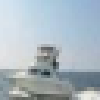

In [24]:
(data, label) = trainset[100]

print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

       frog       plane        deer       truck


Exception ignored in: <bound method DataLoaderIter.__del__ of <torch.utils.data.dataloader.DataLoaderIter object at 0x7f9c77acfe80>>
Traceback (most recent call last):
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 333, in __del__
    self._shutdown_workers()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 319, in _shutdown_workers
    self.data_queue.get()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/site-packages/torch/multiprocessing/reductions.py", line 70, in rebuild_storage_fd
    fd = df.detach()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/home/lrl/anaconda3/envs/

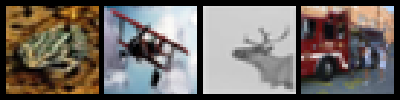

Process Process-16:
Process Process-15:
Traceback (most recent call last):
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/lrl/anaconda3/envs/pytorchpy36/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
  File "/home/lrl/anac

In [25]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.conv1 = nn.Conv2d(3,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.conv3 = nn.Conv2d(16,120,5)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = F.relu(self.conv3(x))
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc2(x)) 
        x = self.fc3(x)
        return x
     
        
    

net=Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [27]:
params = list(net.parameters())
print(len(params))
for name,parameters in net.named_parameters():
    print(name,':',parameters.size())

10
conv1.weight : torch.Size([6, 3, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
conv3.weight : torch.Size([120, 16, 5, 5])
conv3.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


In [28]:
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()
#http://pytorch.org/docs/master/nn.html有关loss函数


criterion = nn.CrossEntropyLoss()
This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
Shape:
Input: (N,C) where C = number of classes
Target: (N) where each value is 0≤targets[i]≤C−1
Output: scalar. If reduce is False, then (N) instead

In [30]:
t.set_num_threads(8)
for epoch in range(2):
    running_loss=0.0
    for i,data in enumerate(trainloader, 0):
        inputs,labels = data
        #print(labels)
        #net.cuda()
        inputs, labels = Variable(inputs), Variable(labels)
        #images, labels = images.cuda(), labels.cuda()
        
        optimizer.zero_grad()
        outputs = net(inputs)
        #一个类实际上只是一个模板，并不是真正的对象，我们需要通过创建该类的实例的方法来建立一个真正的对象
        #print(outputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()       
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d,%5d] loss=%.3f'%(epoch+1,i+1,running_loss/2000))
            running_loss = 0.0

            

[1, 2000] loss=1.914
[1, 4000] loss=1.689
[1, 6000] loss=1.622
[1, 8000] loss=1.528
[1,10000] loss=1.481
[1,12000] loss=1.404
[2, 2000] loss=1.344
[2, 4000] loss=1.329
[2, 6000] loss=1.286
[2, 8000] loss=1.275
[2,10000] loss=1.264
[2,12000] loss=1.268


In [44]:
correct=0
total=0
for data in testloader:
    inputs,labels = data
    inputs = Variable(inputs)
    outputs = net(inputs)
    _,prediction = t.max(outputs.data,1)
    total += labels.size()[0]
    correct += t.sum(prediction == labels)

print('测试准确率为%f %%'%(100*correct/total))

测试准确率为54.800000 %


In [45]:
if t.cuda.is_available():
    net.cuda()
    images = images.cuda()
    labels = labels.cuda()
    output = net(Variable(images))
    loss= criterion(output,Variable(labels))

RuntimeError: Expected object of type torch.FloatTensor but found type torch.cuda.FloatTensor for argument #2 'weight'